In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

**Load The Dataset**



In [2]:
%env Base_dir=/content/drive/MyDrive/Skin_Dataset

env: Base_dir=/content/drive/MyDrive/Skin_Dataset


# **Load & Shuffle The Train Data**

In [7]:

Train_path=[]
Train_labels=[]
for label in os.listdir(Train_dir):
  print(label)


Malignant
Benign


In [ ]:
for label in os.listdir(Train_dir):
    for image in os.listdir(os.path.join(Train_dir, label)): # Use 'label' instead of 'labels' for the current subdirectory
        print(image) # Indent this line to be part of the inner loop

101.jpg
10.jpg
1.jpg
100.jpg
102.jpg
103.jpg
105.jpg
106.jpg
104.jpg
108.jpg
107.jpg
110.jpg
109.jpg
11.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
12.jpg
118.jpg
119.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
130.jpg
13.jpg
131.jpg
133.jpg
132.jpg
134.jpg
135.jpg
138.jpg
136.jpg
137.jpg
14.jpg
139.jpg
140.jpg
143.jpg
142.jpg
141.jpg
145.jpg
144.jpg
147.jpg
146.jpg
148.jpg
149.jpg
151.jpg
15.jpg
150.jpg
152.jpg
153.jpg
155.jpg
154.jpg
157.jpg
156.jpg
158.jpg
160.jpg
159.jpg
16.jpg
161.jpg
163.jpg
162.jpg
166.jpg
165.jpg
164.jpg
167.jpg
168.jpg
169.jpg
171.jpg
170.jpg
17.jpg
173.jpg
172.jpg
174.jpg
175.jpg
177.jpg
176.jpg
178.jpg
179.jpg
18.jpg
180.jpg
181.jpg
182.jpg
183.jpg
184.jpg
185.jpg
187.jpg
186.jpg
188.jpg
189.jpg
19.jpg
190.jpg
192.jpg
191.jpg
194.jpg
193.jpg
195.jpg
197.jpg
196.jpg
199.jpg
198.jpg
2.jpg
202.jpg
200.jpg
201.jpg
20.jpg
204.jpg
203.jpg
206.jpg
205.jpg
209.jpg
208.jpg
207.jpg
210.jpg
211.jpg
21.jpg
212.jpg


In [22]:
Train_path=[]
Train_labels=[]
for label in os.listdir (Train_dir):
    for image in os.listdir(os.path.join(Train_dir, label)):
        Train_path.append(os.path.join(Train_dir, label, image))
        Train_labels.append(label)
    Train_path, Train_labels = shuffle(Train_path, Train_labels) # Indentation fixed here
Train_path # Indentation fixed here

['/content/drive/MyDrive/Skin_Dataset/train/Benign/221.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Benign/122.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Malignant/489.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Malignant/210.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Benign/239.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Benign/341.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Malignant/231.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Benign/96.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Malignant/204.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Benign/349.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Malignant/179.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Malignant/170.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Benign/68.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Benign/226.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Malignant/299.jpg',
 '/content/drive/MyDrive/Skin_Dataset/train/Malignant/180.jpg',
 '

In [23]:
Test_path=[]
Test_labels=[]
for label in os.listdir (Test_dir):
    for image in os.listdir(os.path.join(Test_dir, label)):
        Test_path.append(os.path.join(Test_dir, label, image))
        Test_labels.append(label)
    Test_path, Test_labels = shuffle(Test_path, Test_labels) # Indentation fixed here
Test_path # Indentation fixed here

['/content/drive/MyDrive/Skin_Dataset/test/Benign/6676.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6731.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6740.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Malignant/5688.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6576.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Malignant/5920.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6387.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6552.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6308.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6786.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6567.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Malignant/5813.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Malignant/5859.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6625.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6684.jpg',
 '/content/drive/MyDrive/Skin_Dataset/test/Benign/6461.jpg',
 '/content/d

# **Data Visualization**

In [26]:
import random
import matplotlib.pyplot as plt
# select the random indcies for 10 imag
random_indices = random.sample(range(len(Train_path)), 10)
random_indices

[306, 675, 681, 329, 474, 981, 296, 987, 563, 663]

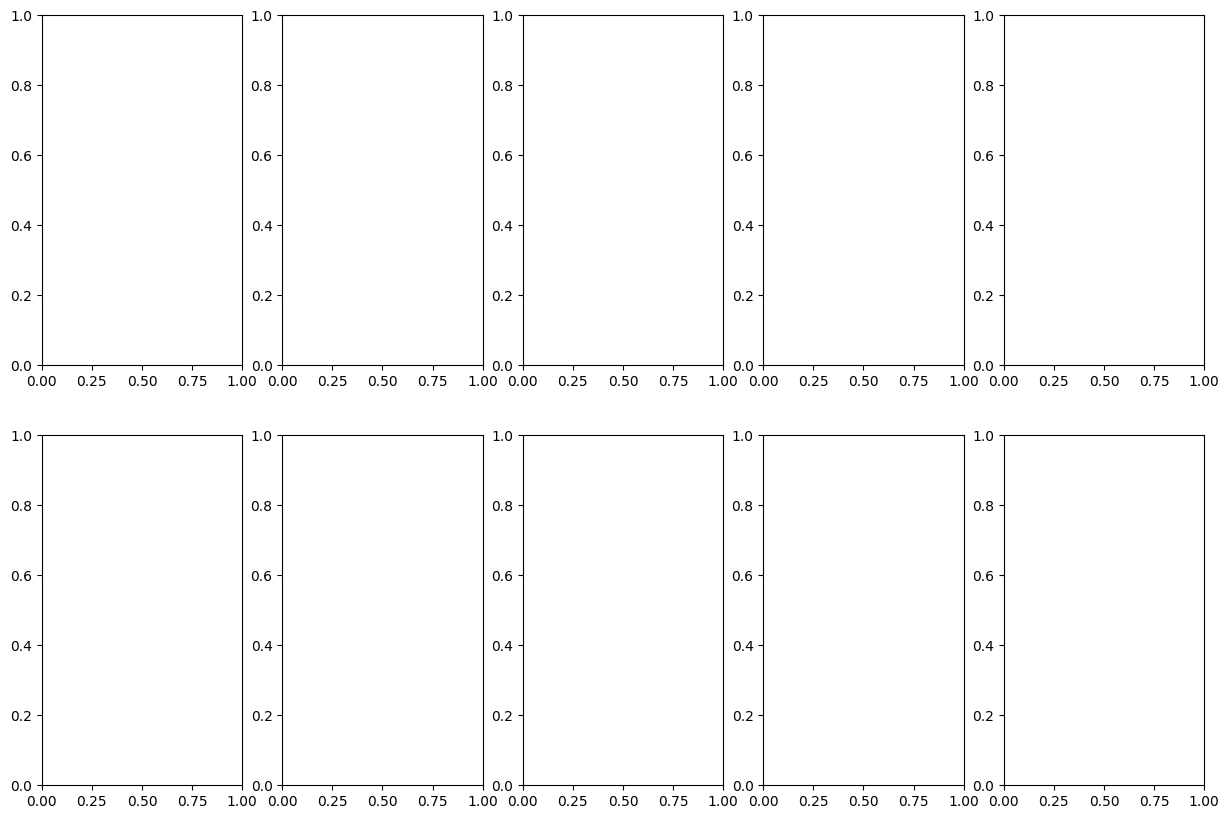

In [27]:
# create a figure to display image in 2 row
fig, axes = plt.subplots(2, 5, figsize=(15, 10))